In [2]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.0 kB 435.7 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 327.7 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 406.4 kB/s eta 0:00:00
     ---------------------------------------- 0.0/315.3 kB ? eta -:--:--
     - -------------------------------------- 10.2/315.3 kB ? eta -:--:--
     ---- -------------------------------- 41.0/315.3 kB 653.6 kB/s eta 0:00:01
     ---------- -------------------------- 92.2/315.3 kB 751.6 kB/s eta 0:00:01
     -------------- --------------------- 122.9/315.3 kB 804.6 kB/s eta 0:00:01
     ------------------- ---------------- 174.1/315.3 kB 876.1 kB/s eta 0:00:01
     -------------------------- --------- 235.5/315.3 kB 901.1 kB/s et

In [3]:
import yfinance as yf
import pandas as pd

In [4]:
data = yf.download('AAPL',start='2010-01-01')

[*********************100%%**********************]  1 of 1 completed


In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409361,447610800
...,...,...,...,...,...,...
2024-04-22,165.520004,167.259995,164.770004,165.839996,165.839996,48116400
2024-04-23,165.350006,167.050003,164.919998,166.899994,166.899994,49537800
2024-04-24,166.539993,169.300003,166.210007,169.020004,169.020004,48251800


In [6]:
# Simple time series - always pick adj close

data['factor'] = ((data['Adj Close'] / data['Close']))

In [7]:
data.loc['2023-01-01':]

,Open,High,Low,Close,Adj Close,Volume,factor
Date,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216309,112117500,0.993174
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600,0.993174
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166641,80962700,0.993174
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735245,87754700,0.993174
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261627,70790800,0.993174
...,...,...,...,...,...,...,...
2024-04-22,165.520004,167.259995,164.770004,165.839996,165.839996,48116400,1.000000
2024-04-23,165.350006,167.050003,164.919998,166.899994,166.899994,49537800,1.000000
2024-04-24,166.539993,169.300003,166.210007,169.020004,169.020004,48251800,1.000000


In [8]:
# Series data
data['Adj Close']

Date
2010-01-04      6.470740
2010-01-05      6.481928
2010-01-06      6.378826
2010-01-07      6.367033
2010-01-08      6.409361
                 ...    
2024-04-22    165.839996
2024-04-23    166.899994
2024-04-24    169.020004
2024-04-25    169.889999
2024-04-26    169.300003
Name: Adj Close, Length: 3603, dtype: float64

In [9]:
# A dataframe
data[['Adj Close']]

,Adj Close
Date,
2010-01-04,6.470740
2010-01-05,6.481928
2010-01-06,6.378826
2010-01-07,6.367033
2010-01-08,6.409361
...,...
2024-04-22,165.839996
2024-04-23,166.899994
2024-04-24,169.020004


In [10]:
apl_close = data[['Adj Close']]

In [11]:
apl_close.shift(1)
# shifting the data values by 1 row down

,Adj Close
Date,
2010-01-04,NaN
2010-01-05,6.470740
2010-01-06,6.481928
2010-01-07,6.378826
2010-01-08,6.367033
...,...
2024-04-22,165.000000
2024-04-23,165.839996
2024-04-24,166.899994


In [12]:
apl_close.shift(-1)
# shifting the values from one row up

,Adj Close
Date,
2010-01-04,6.481928
2010-01-05,6.378826
2010-01-06,6.367033
2010-01-07,6.409361
2010-01-08,6.352823
...,...
2024-04-22,166.899994
2024-04-23,169.020004
2024-04-24,169.889999


- Shifting is a good use for daily changes for stock prices.

In [13]:
data['return'] = ((apl_close / apl_close.shift(1))) - 1

In [14]:
data

,Open,High,Low,Close,Adj Close,Volume,factor,return
Date,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600,0.846599,NaN
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800,0.846599,0.001729
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000,0.846600,-0.015906
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200,0.846600,-0.001849
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409361,447610800,0.846599,0.006648
...,...,...,...,...,...,...,...,...
2024-04-22,165.520004,167.259995,164.770004,165.839996,165.839996,48116400,1.000000,0.005091
2024-04-23,165.350006,167.050003,164.919998,166.899994,166.899994,49537800,1.000000,0.006392
2024-04-24,166.539993,169.300003,166.210007,169.020004,169.020004,48251800,1.000000,0.012702


In [15]:
data['return'] = data['Adj Close'].pct_change()

In [16]:
data

,Open,High,Low,Close,Adj Close,Volume,factor,return
Date,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600,0.846599,NaN
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800,0.846599,0.001729
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000,0.846600,-0.015906
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200,0.846600,-0.001849
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409361,447610800,0.846599,0.006648
...,...,...,...,...,...,...,...,...
2024-04-22,165.520004,167.259995,164.770004,165.839996,165.839996,48116400,1.000000,0.005091
2024-04-23,165.350006,167.050003,164.919998,166.899994,166.899994,49537800,1.000000,0.006392
2024-04-24,166.539993,169.300003,166.210007,169.020004,169.020004,48251800,1.000000,0.012702


In [17]:
data.isnull().sum()
# The first value of return is NA.

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
factor       0
return       1
dtype: int64

In [19]:
data['Open'].diff()
# data[index+1] - data[index]

Date
2010-01-04         NaN
2010-01-05    0.041786
2010-01-06   -0.007857
2010-01-07   -0.093929
2010-01-08   -0.051786
                ...   
2024-04-22   -0.690002
2024-04-23   -0.169998
2024-04-24    1.189987
2024-04-25    2.990005
2024-04-26    0.339996
Name: Open, Length: 3603, dtype: float64

In [20]:
open_diff = data['Open'].diff()

In [21]:
open_diff

Date
2010-01-04         NaN
2010-01-05    0.041786
2010-01-06   -0.007857
2010-01-07   -0.093929
2010-01-08   -0.051786
                ...   
2024-04-22   -0.690002
2024-04-23   -0.169998
2024-04-24    1.189987
2024-04-25    2.990005
2024-04-26    0.339996
Name: Open, Length: 3603, dtype: float64

In [23]:
open_diff.dropna(inplace=True)

In [24]:
open_diff

Date
2010-01-05    0.041786
2010-01-06   -0.007857
2010-01-07   -0.093929
2010-01-08   -0.051786
2010-01-11    0.089286
                ...   
2024-04-22   -0.690002
2024-04-23   -0.169998
2024-04-24    1.189987
2024-04-25    2.990005
2024-04-26    0.339996
Name: Open, Length: 3602, dtype: float64

In [28]:
# rolling function rolls over a number of rows to calculate
# ten day moving average example

data['Close'].rolling(10).mean().dropna()

# data.Close.iloc[:10].sum()/10
# data.Close.iloc[1:11].sum()/10 and so on

Date
2010-01-15      7.520571
2010-01-19      7.524250
2010-01-20      7.514786
2010-01-21      7.504428
2010-01-22      7.458607
                 ...    
2024-04-22    169.698999
2024-04-23    169.421999
2024-04-24    169.545999
2024-04-25    169.031000
2024-04-26    168.306000
Name: Close, Length: 3594, dtype: float64

In [29]:
# Axis arguments
data

,Open,High,Low,Close,Adj Close,Volume,factor,return
Date,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600,0.846599,NaN
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800,0.846599,0.001729
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000,0.846600,-0.015906
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200,0.846600,-0.001849
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409361,447610800,0.846599,0.006648
...,...,...,...,...,...,...,...,...
2024-04-22,165.520004,167.259995,164.770004,165.839996,165.839996,48116400,1.000000,0.005091
2024-04-23,165.350006,167.050003,164.919998,166.899994,166.899994,49537800,1.000000,0.006392
2024-04-24,166.539993,169.300003,166.210007,169.020004,169.020004,48251800,1.000000,0.012702


In [30]:
# axis argument determines dropping the whole row 
# or whole column with na value 0 for row, 1 for column
data.dropna(axis=0)

,Open,High,Low,Close,Adj Close,Volume,factor,return
Date,,,,,,,,
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800,0.846599,0.001729
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000,0.846600,-0.015906
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200,0.846600,-0.001849
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409361,447610800,0.846599,0.006648
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.352823,462229600,0.846600,-0.008821
...,...,...,...,...,...,...,...,...
2024-04-22,165.520004,167.259995,164.770004,165.839996,165.839996,48116400,1.000000,0.005091
2024-04-23,165.350006,167.050003,164.919998,166.899994,166.899994,49537800,1.000000,0.006392
2024-04-24,166.539993,169.300003,166.210007,169.020004,169.020004,48251800,1.000000,0.012702


In [31]:
# shifting the values by column
data.shift(1,axis=1)

,Open,High,Low,Close,Adj Close,Volume,factor,return
Date,,,,,,,,
2010-01-04,NaN,7.622500,7.660714,7.585000,7.643214,6.470740,493729600,0.846599
2010-01-05,NaN,7.664286,7.699643,7.616071,7.656429,6.481928,601904800,0.846599
2010-01-06,NaN,7.656429,7.686786,7.526786,7.534643,6.378826,552160000,0.846600
2010-01-07,NaN,7.562500,7.571429,7.466071,7.520714,6.367033,477131200,0.846600
2010-01-08,NaN,7.510714,7.571429,7.466429,7.570714,6.409361,447610800,0.846599
...,...,...,...,...,...,...,...,...
2024-04-22,NaN,165.520004,167.259995,164.770004,165.839996,165.839996,48116400,1.000000
2024-04-23,NaN,165.350006,167.050003,164.919998,166.899994,166.899994,49537800,1.000000
2024-04-24,NaN,166.539993,169.300003,166.210007,169.020004,169.020004,48251800,1.000000


In [32]:
data['Close'].nlargest(5)

Date
2023-12-14    198.110001
2023-12-13    197.960007
2023-12-15    197.570007
2023-12-19    196.940002
2023-07-31    196.449997
Name: Close, dtype: float64

In [33]:
data.nlargest(3,'Close')

,Open,High,Low,Close,Adj Close,Volume,factor,return
Date,,,,,,,,
2023-12-14,198.020004,199.619995,196.160004,198.110001,197.857529,66831600,0.998726,0.000758
2023-12-13,195.089996,198.000000,194.850006,197.960007,197.707718,70404200,0.998726,0.016691
2023-12-15,197.529999,198.399994,197.000000,197.570007,197.318222,128256700,0.998726,-0.002726


In [35]:
data['Close'].nsmallest(5)

Date
2010-02-04    6.858929
2010-01-29    6.859286
2010-02-08    6.932857
2010-02-01    6.954643
2010-02-10    6.968571
Name: Close, dtype: float64

In [36]:
data.nsmallest(3,'Close')

,Open,High,Low,Close,Adj Close,Volume,factor,return
Date,,,,,,,,
2010-02-04,7.026071,7.084643,6.841786,6.858929,5.806765,757652000,0.846599,-0.036039
2010-01-29,7.181429,7.221429,6.794643,6.859286,5.807068,1245952400,0.846599,-0.036279
2010-02-08,6.988929,7.067143,6.928571,6.932857,5.869354,478270800,0.846600,-0.006855


In [41]:
# resampling data
# works on date indices
# 'M' is deprecated
data.resample('ME').sum()

,Open,High,Low,Close,Adj Close,Volume,factor,return
Date,,,,,,,,
2010-01-31,142.099288,143.332858,139.311073,140.949642,119.327891,15168994400,16.085390,-0.103156
2010-02-28,134.419642,136.023216,133.218928,134.897143,114.203853,10776080000,16.085390,0.065297
2010-03-31,183.011787,184.558929,181.769999,183.516071,155.364614,12154172800,19.471788,0.140356
2010-04-30,188.251070,189.852498,186.089999,188.361429,159.466689,12367129600,17.778589,0.109044
2010-05-31,179.985357,182.584289,174.873570,179.615357,152.062271,18082654800,16.931990,-0.008306
...,...,...,...,...,...,...,...,...
2023-12-31,3884.199997,3906.189987,3857.779984,3886.170029,3881.217484,1062774800,19.974512,0.014275
2024-01-31,3939.539993,3968.979996,3908.089996,3942.209961,3937.185974,1187219300,20.973237,-0.040802
2024-02-29,3693.360001,3720.860001,3660.620010,3695.510010,3694.073242,1161627000,19.992354,-0.018130


In [43]:
data.resample('ME').sum()[['Volume']]

,Volume
Date,
2010-01-31,15168994400
2010-02-28,10776080000
2010-03-31,12154172800
2010-04-30,12367129600
2010-05-31,18082654800
...,...
2023-12-31,1062774800
2024-01-31,1187219300
2024-02-29,1161627000


In [46]:
data.loc[:'2015-01-31']['Volume'].sum()

578349046800

In [57]:
# Starting from 2015 to latest and get the max value of High column for each row
data.loc['2015-01-01':].resample('ME').max()['High']

Date
2015-01-31     30.000000
2015-02-28     33.400002
2015-03-31     32.570000
2015-04-30     33.634998
2015-05-31     33.242500
                 ...    
2023-12-31    199.619995
2024-01-31    196.380005
2024-02-29    191.050003
2024-03-31    180.529999
2024-04-30    178.360001
Freq: ME, Name: High, Length: 112, dtype: float64

In [59]:
# Resampling OHLC data on a monthly basis
data

,Open,High,Low,Close,Adj Close,Volume,factor,return
Date,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600,0.846599,NaN
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800,0.846599,0.001729
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000,0.846600,-0.015906
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200,0.846600,-0.001849
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409361,447610800,0.846599,0.006648
...,...,...,...,...,...,...,...,...
2024-04-22,165.520004,167.259995,164.770004,165.839996,165.839996,48116400,1.000000,0.005091
2024-04-23,165.350006,167.050003,164.919998,166.899994,166.899994,49537800,1.000000,0.006392
2024-04-24,166.539993,169.300003,166.210007,169.020004,169.020004,48251800,1.000000,0.012702


In [60]:
data.resample('ME').agg({
    'Open':'first',
    'High':'max',
    'Low':'min',
    'Close':'last'
})

,Open,High,Low,Close
Date,,,,
2010-01-31,7.622500,7.699643,6.794643,6.859286
2010-02-28,6.870357,7.327500,6.816071,7.307857
2010-03-31,7.348214,8.481429,7.337500,8.392857
2010-04-30,8.478929,9.730714,8.312500,9.324643
2010-05-31,9.422857,9.567143,7.116071,9.174286
...,...,...,...,...
2023-12-31,190.330002,199.619995,187.449997,192.529999
2024-01-31,187.149994,196.380005,180.169998,184.399994
2024-02-29,183.990005,191.050003,179.250000,180.750000


In [61]:
# data from 2015
data['2015-01-01':].resample('ME').agg({
    'Open':'first',
    'High':'max',
    'Low':'min',
    'Close':'last'
})

,Open,High,Low,Close
Date,,,,
2015-01-31,27.847500,30.000000,26.157499,29.290001
2015-02-28,29.512501,33.400002,29.020000,32.115002
2015-03-31,32.312500,32.570000,30.407499,31.107500
2015-04-30,31.205000,33.634998,30.775000,31.287500
2015-05-31,31.525000,33.242500,30.840000,32.570000
...,...,...,...,...
2023-12-31,190.330002,199.619995,187.449997,192.529999
2024-01-31,187.149994,196.380005,180.169998,184.399994
2024-02-29,183.990005,191.050003,179.250000,180.750000


#### Plotting data

In [70]:
# !pip install matplotlib

In [69]:
import matplotlib.pyplot as plt

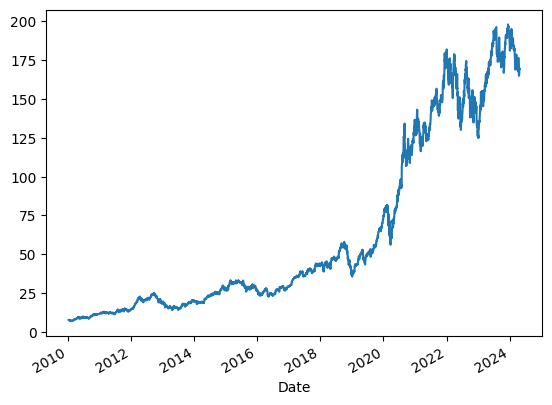

In [71]:
# Plotting close
data['Close'].plot()
plt.show()


<Axes: xlabel='Date'>

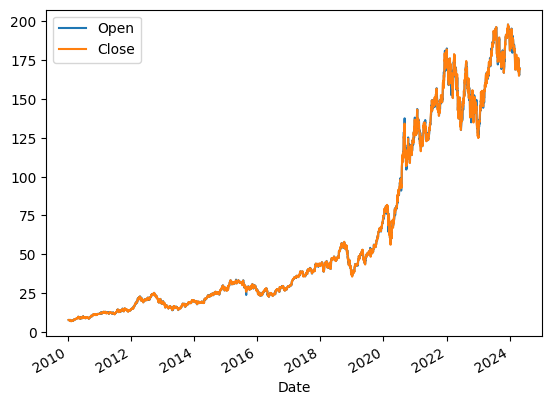

In [72]:
data[['Open','Close']].plot()

<Axes: ylabel='Frequency'>

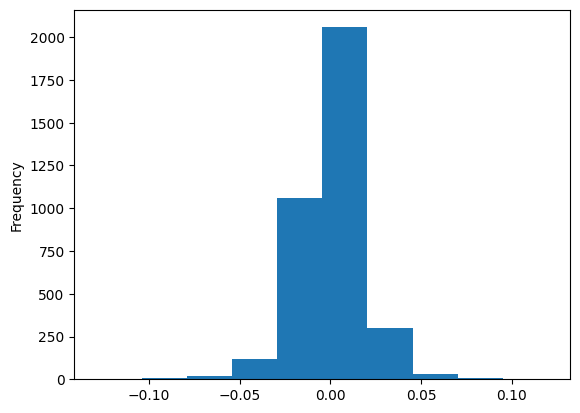

In [73]:
data['return'].plot(kind='hist')

<Axes: ylabel='Frequency'>

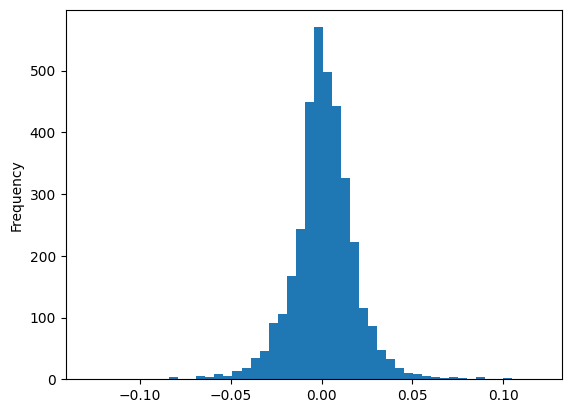

In [74]:
data['return'].plot(kind='hist',bins=50)

<Axes: xlabel='Date'>

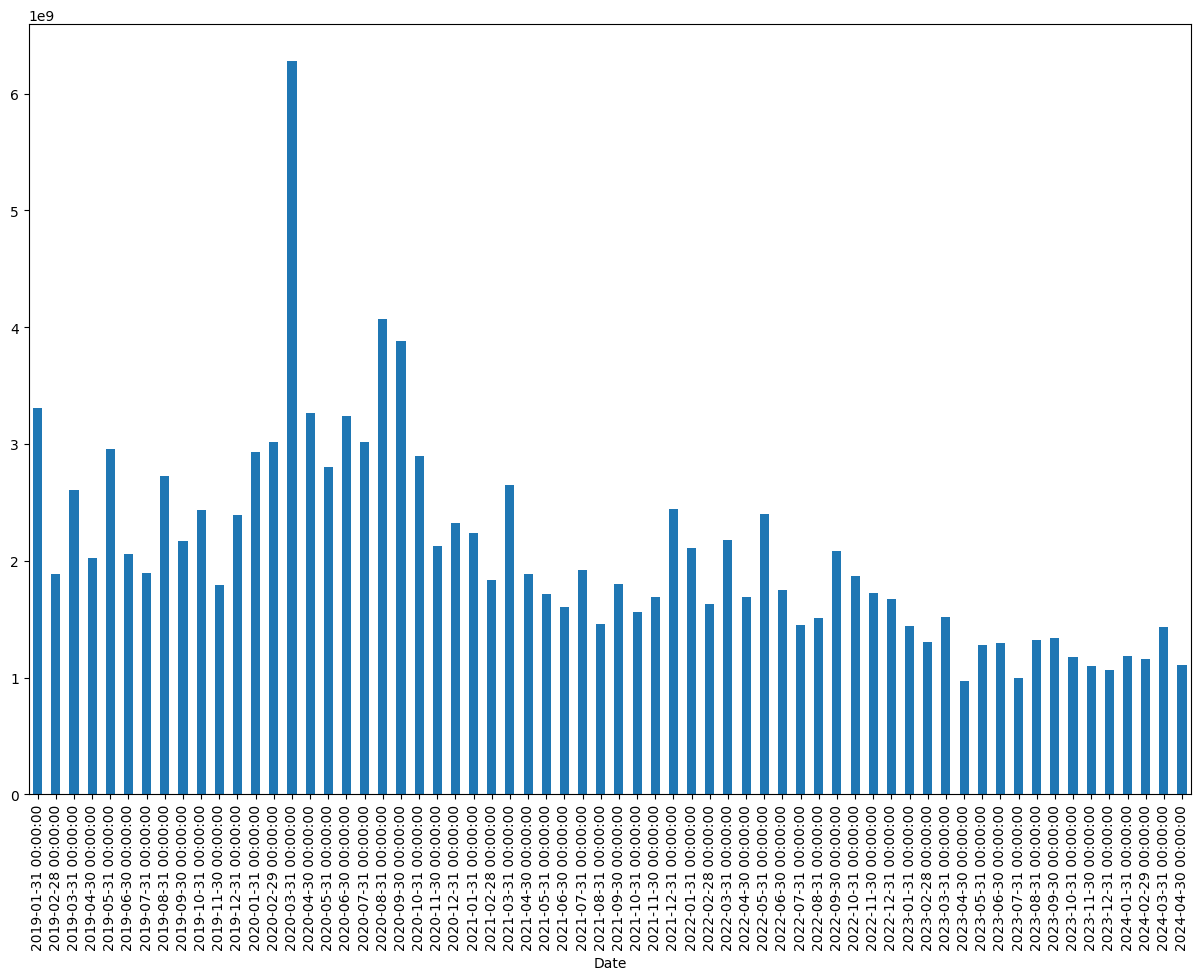

In [78]:
plt.figure(figsize=(15,10))
data.loc['2019-01-01':].resample('ME').sum().Volume.plot(kind='bar')